# Exploring

Next to static map plotting, PyPSA allows for exploring networks on a map, interactively. With `Network.explore()`, you can explore the location of all components, including buses, lines, links, transformers, their component attributes and map results or other properties to the bus sizes, branch widths, colors, etc. Calling the method returns a standard `pydeck.Deck` object than can be layered on top of other `pydeck.Deck` objects (see https://deckgl.readthedocs.io/en/latest/layer.html). They can also be exported in self-contained HTML files for sharing. In this notebook, we demonstrate the features of `Network.explore()` using the [SciGRID example](/examples/scigrid-lopf-then-pf).


## Input data

In [1]:
import geopandas as gpd
import pypsa

n = pypsa.examples.scigrid_de()

INFO:pypsa.network.io:Retrieving network data from https://github.com/PyPSA/PyPSA/raw/v1.0.0rc1/examples/networks/scigrid-de/scigrid-de.nc.
INFO:pypsa.network.io:Imported network 'SciGrid-DE' has buses, carriers, generators, lines, loads, storage_units, transformers


## Preparation

For illustrative purposes and a simpler postprocessing workflow, we cluster the network (see [Network Clustering](/examples/clustering) for details) based on federal states. You can ignore the blocks in Preparation.

In [2]:
n.calculate_dependent_values()
n.lines = n.lines.reindex(columns=n.components["Line"]["attrs"].index[1:])
n.lines["type"] = "Al/St 240/40 2-bundle 220.0"
n.buses = n.buses.reindex(columns=n.components["Bus"]["attrs"].index[1:])
n.buses["frequency"] = 50

In [3]:
url = "https://media.githubusercontent.com/media/wmgeolab/geoBoundaries/9469f09592ced973a3448cf66b6100b741b64c0d/releaseData/gbOpen/DEU/ADM1/geoBoundaries-DEU-ADM1-all.zip"
states = gpd.read_file(url, layer="geoBoundaries-DEU-ADM1_simplified")
states["shapeName"] = states["shapeName"].apply(lambda x: x.encode("latin1").decode("utf-8")) # fix encoding issue

In [4]:
bus_coords = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy(n.buses.x, n.buses.y, crs=4326), index=n.buses.index
)
busmap = bus_coords.to_crs(3035).sjoin_nearest(states.to_crs(3035), how="left").shapeISO
nc = n.cluster.cluster_by_busmap(busmap)

Let’s take an initial look at the network. By default, `n.explore()` displays useful information in the tooltip for each component type, including component names and their default sizes or widths. You can hover over the elements in the map below to inspect the data interactively. Optionally, you can disable tooltip by setting `tooltip=False` — this can help reduce processing time and decrease the file size when exporting to HTML.

In [5]:
nc.explore()

{
  "initialViewState": {
    "bearing": 0,
    "latitude": 51.538416918097774,
    "longitude": 10.209373556045822,
    "pitch": 0,
    "zoom": 4
  },
  "layers": [
    {
      "@@type": "PathLayer",
      "autoHighlight": true,
      "data": [
        {
          "bus0": "DE-BB",
          "bus1": "DE-BE",
          "color": "rosybrown",
          "name": "0",
          "path": [
            [
              13.5450675039625,
              52.464297302443754
            ],
            [
              13.411308779241667,
              52.5284074745
            ]
          ],
          "rgba": [
            188,
            143,
            143,
            230
          ],
          "tooltip_html": "<b>0</b>\n<table>\n<tr><td style='font-weight:bold'>bus0:</td><td style='text-align:left'>DE-BB</td></tr>\n<tr><td style='font-weight:bold'>bus1:</td><td style='text-align:left'>DE-BE</td></tr>\n<tr><td style='font-weight:bold'>color:</td><td style='text-align:left'>rosybrown</td></tr>\n<tr><td style='font-weight:bold'>width:</td><td style='text-align:left'>2</td></tr>\n</table>",
          "width": 2,
          "width_pdk": 2000.0
        },
        {
          "bus0": "DE-BB",
          "bus1": "DE-MV",
          "color": "rosybrown",
          "name": "1",
          "path": [
            [
              13.5450675039625,
              52.464297302443754
            ],
            [
              12.707410260126666,
              53.90248543789333
            ]
          ],
          "rgba": [
            188,
            143,
            143,
            230
          ],
          "tooltip_html": "<b>1</b>\n<table>\n<tr><td style='font-weight:bold'>bus0:</td><td style='text-align:left'>DE-BB</td></tr>\n<tr><td style='font-weight:bold'>bus1:</td><td style='text-align:left'>DE-MV</td></tr>\n<tr><td style='font-weight:bold'>color:</td><td style='text-align:left'>rosybrown</td></tr>\n<tr><td style='font-weight:bold'>width:</td><td style='text-align:left'>2</td></tr>\n</table>",
          "width": 2,
          "width_pdk": 2000.0
        },
        {
          "bus0": "DE-BY",
          "bus1": "DE-HE",
          "color": "rosybrown",
          "name": "10",
          "path": [
            [
              11.192258866155832,
              48.68678897713889
            ],
            [
              8.818574336943705,
              50.30150143553704
            ]
          ],
          "rgba": [
            188,
            143,
            143,
            230
          ],
          "tooltip_html": "<b>10</b>\n<table>\n<tr><td style='font-weight:bold'>bus0:</td><td style='text-align:left'>DE-BY</td></tr>\n<tr><td style='font-weight:bold'>bus1:</td><td style='text-align:left'>DE-HE</td></tr>\n<tr><td style='font-weight:bold'>color:</td><td style='text-align:left'>rosybrown</td></tr>\n<tr><td style='font-weight:bold'>width:</td><td style='text-align:left'>2</td></tr>\n</table>",
          "width": 2,
          "width_pdk": 2000.0
        },
        {
          "bus0": "DE-BY",
          "bus1": "DE-SN",
          "color": "rosybrown",
          "name": "11",
          "path": [
            [
              11.192258866155832,
              48.68678897713889
            ],
            [
              13.353962860215,
              51.06330574821
            ]
          ],
          "rgba": [
            188,
            143,
            143,
            230
          ],
          "tooltip_html": "<b>11</b>\n<table>\n<tr><td style='font-weight:bold'>bus0:</td><td style='text-align:left'>DE-BY</td></tr>\n<tr><td style='font-weight:bold'>bus1:</td><td style='text-align:left'>DE-SN</td></tr>\n<tr><td style='font-weight:bold'>color:</td><td style='text-align:left'>rosybrown</td></tr>\n<tr><td style='font-weight:bold'>width:</td><td style='text-align:left'>2</td></tr>\n</table>",
          "width": 2,
          "width_pdk": 2000.0
        },
        {
          "bus0": "DE-BY",
          "bus1": "DE-TH",
          "color": "rosybrown",
       

With `help(n.explore)`, we can check what parameters the method accepts:

<style>
/* Scrollable fenced code block just for this cell */
.scrollable-code pre {
    max-height: 250px;
    overflow-y: auto;
    display: block;
}
</style>

<div class="scrollable-code">

```text
Docstring:
Create an interactive map of the PyPSA network using Pydeck.

Parameters
----------
branch_width_factor : float, default 1.0
    Branch widths are scaled by this factor.
bus_size : float/dict/pandas.Series
    Sizes of bus points in km² (corresponds to circle area), defaults to 25 km².
bus_size_factor : float, default 1.0
    Bus sizes are scaled by this factor.
bus_split_circle : bool, default False
    Draw half circles if bus_size is a pandas.Series with a Multiindex.
    If set to true, the upper half circle per bus then includes all positive values
    of the series, the lower half circle all negative values. Defaults to False.
bus_color : str/dict/pandas.Series/None
    Colors for the buses, defaults to "cadetblue". If bus_size is a
    pandas.Series with a Multiindex, bus_color defaults to the
    n.c.carriers.static['color'] column.
bus_cmap : mcolors.Colormap/str, default 'Reds'
    If bus_color are floats, this color map will assign the colors.
bus_cmap_norm : mcolors.Normalize/None
    Normalization for bus_cmap, defaults to None.
bus_alpha : float/dict/pandas.Series
    Add alpha channel to buses, defaults to 0.9.
line_flow : float/dict/pandas.Series, default 0
    Series of line flows indexed by line names, defaults to 0. If 0, no arrows will be created.
    If a float is provided, it will be used as a constant flow for all lines.
line_color : str/dict/pandas.Series
    Colors for the lines, defaults to 'rosybrown'.
line_alpha : float/dict/pandas.Series
    Add alpha channel to lines, defaults to 0.9.
line_width : float/dict/pandas.Series, default 2
    Widths of line component in km.
link_flow : float/dict/pandas.Series, default 0
    Series of link flows indexed by link names, defaults to 0. If 0, no arrows will be created.
    If a float is provided, it will be used as a constant flow for all links.
link_color : str/dict/pandas.Series
    Colors for the links, defaults to 'darkseagreen'.
link_alpha : float/dict/pandas.Series
    Add alpha channel to links, defaults to 0.9.
link_width : float/dict/pandas.Series, default 2
    Widths of link component in km.
tooltip : bool, default True
    Whether to add a tooltip to the bus layer.

Other Parameters
----------------
branch_components : list, set, optional, default ['Line', 'Link', 'Transformer']
    Branch components to be plotted.
branch_width_max : float, default 10
    Maximum width of branch component in km when `auto_scale` is True.
bus_size_max : float, default 10000
    Maximum area size of bus component in km² when `auto_scale` is True.
line_cmap : mcolors.Colormap/str, default 'viridis'
    If line_color are floats, this color map will assign the colors.
line_cmap_norm : mcolors.Normalize
    The norm applied to the line_cmap.
link_cmap : mcolors.Colormap/str, default 'viridis'
    If link_color are floats, this color map will assign the colors.
link_cmap_norm : mcolors.Normalize|matplotlib.colors.*Norm
    The norm applied to the link_cmap.
transformer_flow : float/dict/pandas.Series, default 0
    Series of transformer flows indexed by transformer names, defaults to 0. If 0, no arrows will be created.
    If a float is provided, it will be used as a constant flow for all transformers.
transformer_color : str/dict/pandas.Series
    Colors for the transformers, defaults to 'orange'.
transformer_cmap : mcolors.Colormap/str, default 'viridis'
    If transformer_color are floats, this color map will assign the colors.
transformer_cmap_norm : matplotlib.colors.Normalize|matplotlib.colors.*Norm
    The norm applied to the transformer_cmap.
transformer_alpha : float/dict/pandas.Series
    Add alpha channel to transformers, defaults to 0.9.
transformer_width : float/dict/pandas.Series, default 2
    Widths of transformer in km.
arrow_size_factor : float, default 1.5
    Multiplier on branch flows to scale the arrow size.
arrow_color : str/dict/pandas.Series | None, default None
    Colors for the arrows. If not specified, defaults to the same colors as the respective branch component.
arrow_cmap : str/matplotlib.colors.Colormap, default 'viridis'
    Colormap to use if arrow_color is a numeric pandas.Series.
arrow_cmap_norm : matplotlib.colors.Normalize, optional
    Normalization to use if arrow_color is a numeric pandas.Series.
arrow_alpha : float/dict/pandas.Series, default 0.9
    Add alpha channel to arrows, defaults to 0.9.
bus_columns : list, default None
    List of bus columns to include.
    Specify additional columns to include in the tooltip.
line_columns : list, default None
    List of line columns to include. If None, only the bus0 and bus1 columns are used.
    Specify additional columns to include in the tooltip.
link_columns : list, default None
    List of link columns to include. If None, only the bus0 and bus1 columns are used.
    Specify additional columns to include in the tooltip.
transformer_columns : list, default None
    List of transformer columns to include. If None, only the bus0 and bus1 columns are used.
    Specify additional columns to include in the tooltip.
geomap : bool, default False
    Whether to add a geomap layer to the plot.
geomap_alpha : float, default 0.9
    Alpha transparency for the geomap features.
geomap_color : dict | None, default None
    Dictionary specifying colors for different geomap features. If None, default colors will be used: `{'land': 'whitesmoke', 'ocean': 'lightblue'}
geomap_resolution : {'110m', '50m', '10m'}, default '50m'
    Resolution of the geomap features. One of '110m', '50m', or '10m'.
geometry : bool, default False
    Whether to use the geometry column of the branch components.

Returns
-------
PydeckPlotter
    The PydeckPlotter instance with the created layers.
```

In the docstrings we see that the method allows for passing the same arguments as its static counterpart `n.plot()` and even a few more. Please be aware that due to how `pydeck` and `matplotlib.pyplot` handle numeric values, passing a value for e.g. `line_width` will achieve a different scalings in each method. In `n.explore()`, all widths and flows passed are translated into km on the interactive map. Values passed for `bus_size` translate into km², accordingly. By default, all branches are rendered at a width of 2 km, buses at a size of 25 km².

## Mapping out results

To map result to parameters of the interactive map, we first solve the network and then use `n.statistics()` to calculate relevant metrics.

In [6]:
# We reduce logging output for clarity
import logging

logging.getLogger("pypsa").setLevel(logging.ERROR)
logging.getLogger("linopy").setLevel(logging.ERROR)

nc.optimize()

Writing continuous variables.: 100%|██████████| 5/5 [00:00<00:00, 53.55it/s]


Running HiGHS 1.11.0 (git hash: 364c83a): Copyright (c) 2025 HiGHS under MIT licence terms
LP   linopy-problem-kjqtsj91 has 76872 rows; 37608 cols; 117490 nonzeros
Coefficient ranges:
  Matrix [4e-01, 9e+01]
  Cost   [3e+00, 1e+02]
  Bound  [0e+00, 0e+00]
  RHS    [2e-11, 2e+04]
Presolving model
1656 rows, 27772 cols, 32438 nonzeros  0s
1512 rows, 5899 cols, 10325 nonzeros  0s
Dependent equations search running on 1488 equations with time limit of 1000.00s
Dependent equations search removed 0 rows and 0 nonzeros in 0.00s (limit = 1000.00s)
1488 rows, 5875 cols, 10459 nonzeros  0s
Presolve : Reductions: rows 1488(-75384); columns 5875(-31733); elements 10459(-107031)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -1.1463614410e+00 Pr: 576(1.25327e+07) 0s
       2284     4.6934521029e+06 Pr: 0(0); Du: 0(1.02802e-12) 0s
Solving the original LP from the solution after postsolve
Model name          : l

('ok', 'optimal')

From above we learned that `bus_size` accepts parameters of type `float`, `dict`, and `pd.Series`. When passing a multi-index `pd.Series`, its values will be mapped to pie chart slices.

In [7]:
eb = nc.statistics.energy_balance(
    groupby=["bus", "carrier"],
    aggregate_across_components=True,
    comps=["Generator", "Load", "StorageUnit"],
)

We also extract branch results, e.g., line and link flows in this example.

In [8]:
line_flow = nc.lines_t.p0.sum(axis=0)
link_flow = nc.links_t.p0.sum(axis=0)

Note that for the pie slices to be plotted and colored correctly, passing a multi-index `pd.Series` requires all carrier colors to exist. Colors can be specified by their hex code representation or from the list of matplotlib names (see https://matplotlib.org/stable/gallery/color/named_colors.html). In `n.statistics.energy_balance` load is also included, so we also need to include the a color for the load carrier.

### Carrier colors

In [9]:
colors = {
    "Multiple": "pink",
    "AC": "black",
    "Brown Coal": "saddlebrown",
    "Gas": "darkorange",
    "Geothermal": "firebrick",
    "Hard Coal": "darkslategray",
    "Nuclear": "mediumorchid",
    "Oil": "peru",
    "Other": "dimgray",
    "Pumped Hydro": "cornflowerblue",
    "Run of River": "royalblue",
    "Solar": "gold",
    "Storage Hydro": "navy",
    "Waste": "olive",
    "Wind Offshore": "teal",
    "Wind Onshore": "turquoise",
}

nc.carriers.color = nc.carriers.index.map(colors)

As the carriers for loads are missing, we need to add them, manually

In [10]:
nc.carriers.loc["", "color"] = "darkred"
nc.carriers.loc["-", "color"] = "darkred"

### Applying n.explore()

Finally, let's pass the results to `n.explore()`. By default the `map_style='road'` is used, we pass `dark` for illustrative purposes. Setting `bus_split_circle=True` maps negative values to the bottom half and positive values to the positive half. If set to `False`, bottom half circles are not used and negative values will automatically be omitted. As the values scale proportionally to the bus area, they are directly translated into km². This may not achieve the outcome we want, this is why we set `auto_scale=True`. This scales the maximum value to `bus_size_max`.  The same applies to `branch_width` and `branch_flow` (`branch_width_max`). By defaults, arrows are scaled by 1.5, so that arrowheads are visible. If you want those to be less or more prominent, scale accordingly. We can pass additional columns for each component type that we want to include in the tooltip. Note that we disable the tooltip in the documentation due to file size limitations of our documentation.

In [28]:
map = nc.explore(
    map_style="dark",
    bus_size=eb,  # MWh -> km²
    bus_split_circle=True,
    bus_size_max=7000,  # km²
    line_color="yellow",
    line_width=line_flow,  # MWh -> km
    link_width=link_flow,  # MWh -> km
    line_flow=line_flow, # MWh -> km
    link_flow=link_flow, # MWh -> km
    branch_width_max=16,  # km
    auto_scale=True,
    bus_columns=["v_nom"],
    line_columns=["s_nom"],
    link_columns=["p_nom"],
    arrow_size_factor=2,
    tooltip=True,  # disabled here for technical limits of mkdocs-jupyter plugin
)

### Exporting the map

To export the interactive map, we use `pydeck`'s built-in features (`pdk.to_html()`). Passing `offline=True` embeds deck.gls JavaScript library. Note that you require an internet connection if you want to be able to view the map tiles in the background. If you want country shapes also be included in the self-contained HTML, set `geomap=True`. This will however increase the file size noticeably.

In [29]:
map.to_html("exploring.html")

FileNotFoundError: [Errno 2] No such file or directory: 'exploring.html'

### Static equivalent

This would be its static equivalent. As mentioned above, scaling is handled differently in `pydeck` and `matplotlib`.

{'nodes': {'Bus': <matplotlib.collections.PatchCollection at 0x7ff9113ef4d0>},
 'branches': {'Line': <matplotlib.collections.LineCollection at 0x7ff9101f2c30>},
 'flows': {'Line': <matplotlib.collections.PatchCollection at 0x7ff910251a00>}}

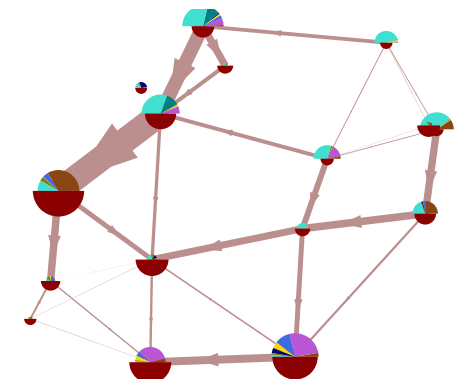

In [ ]:
nc.plot(
    bus_sizes=eb / 3e6,
    bus_split_circles=True,
    line_widths=line_flow / 1e4,
    link_widths=link_flow / 1e4,
    line_flow=line_flow / 5e4
)

### Stacking pydeck layers

We can use `pydeck`s built-in layer functionalities to extend the interactive map with features that are completely unrelated to `pypsa`. For example, we can use the `GeoDataFrame` containing `Polygon` and `MultiPolygon` geometries to color them by average prices (€/MWh).

In [30]:
avg_prices = nc.statistics.prices()
avg_prices.head()

name
DE-BB     9.07328
DE-BE     9.20696
DE-BW    10.50411
DE-BY    10.43519
DE-HB     7.80802
Name: objective, dtype: float64

In [31]:
# Map average prices by shapeISO
states["avg_price"] = states["shapeISO"].map(avg_prices).round(2)

Now we can map colors to the shapes using a colormap and store them as in RGBA formatted lists in the states `GeoDataFrame`.

In [32]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

values = states["avg_price"]
cmap = plt.get_cmap("Reds")
norm = mcolors.Normalize(vmin=values.min(), vmax=values.max())

We need a small helper to convert `mcolors` to `pydeck` ready RGBA lists

In [33]:
def price_to_color(price, alpha=0.7):
    color = cmap(norm(price))  # RGBA in 0-1
    rgb = [round(c * 255) for c in color[:3]]  # only RGB
    a = round(alpha * 255)
    return rgb + [a]

In [34]:
states["color"] = states["avg_price"].apply(price_to_color)
states.head()

shapeName shapeISO                  shapeID shapeGroup shapeType  \
0  Baden-Württemberg    DE-BW  10402087B60055985875400        DEU      ADM1   
1             Bayern    DE-BY  10402087B60477050509260        DEU      ADM1   
2             Berlin    DE-BE  10402087B20892132820961        DEU      ADM1   
3        Brandenburg    DE-BB  10402087B40185768535592        DEU      ADM1   
4             Bremen    DE-HB  10402087B44391416804171        DEU      ADM1   

                                            geometry  avg_price  \
0  MULTIPOLYGON (((9.12593 47.66864, 9.12068 47.6...      10.50   
1  POLYGON ((9.60208 47.58434, 9.60589 47.5857, 9...      10.44   
2  POLYGON ((13.48006 52.67465, 13.47601 52.67039...       9.21   
3  MULTIPOLYGON (((13.05103 51.64768, 13.15453 51...       9.07   
4  MULTIPOLYGON (((8.6164 53.19703, 8.61522 53.19...       7.81   

                  color                                       tooltip_html  
0    [152, 12, 19, 178]  <b>State:</b> Baden-Württemberg<br><b>GID:</b>...  
1    [161, 14, 21, 178]  <b>State:</b> Bayern<br><b>GID:</b> DE-BY<br><...  
2   [251, 105, 74, 178]  <b>State:</b> Berlin<br><b>GID:</b> DE-BE<br><...  
3   [251, 119, 87, 178]  <b>State:</b> Brandenburg<br><b>GID:</b> DE-BB...  
4  [254, 233, 223, 178]  <b>State:</b> Bremen<br><b>GID:</b> DE-HB<br><...

We now create a new layer based on our states `GeoDataFrame` and insert it to `map.layers`. If we append it, the states layer would lie above the pie charts, which would obtrude our previous map.

In [35]:
import pydeck as pdk

# Add a custom tooltip column (HTML or plain text)
states["tooltip_html"] = (
    "<b>State:</b> " + states["shapeName"] + "<br>"
    + "<b>GID:</b> " + states["shapeISO"]
    + "<br><b>Avg. Price:</b> " + states["avg_price"].astype(str) + " €/MWh"
)

# Create layer
states_layer = pdk.Layer(
    "GeoJsonLayer",
    states,
    stroked=True,
    filled=True,
    get_fill_color="color",
    get_line_color=[255, 255, 255, 255],
    line_width_min_pixels=1,
    pickable=True,
    auto_highlight=True,
)

In [36]:
map.layers.insert(0, states_layer)

In [37]:
map.show()